# chapter 14 in chapter exercises

In [16]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.font_manager import FontProperties # for making tables
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import pingouin as pg


In [3]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 14.3: Critical F by df's

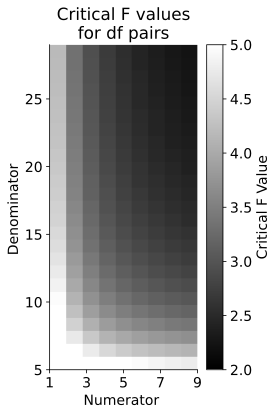

In [4]:
# define the degrees of freedom
df1_values = np.arange(1,10)
df2_values = np.arange(5,30)

# Create a 2D numpy array to store the critical F values
critFvals = np.zeros((len(df2_values),len(df1_values)))

# critical F values for each df pair
for i, df1 in enumerate(df1_values):
  for j, df2 in enumerate(df2_values):
    critFvals[j,i] = stats.f.ppf(.95, df1, df2)


# Plot the matrix as a heatmap
plt.figure(figsize=(4,6))
plt.imshow(critFvals, origin='lower', cmap='gray', interpolation='nearest',aspect='auto',
           extent=[df1_values[0],df1_values[-1],df2_values[0],df2_values[-1]],vmin=2,vmax=5)
plt.colorbar(label='Critical F Value')
plt.xlabel(r'Numerator ')
plt.ylabel(r'Denominator ')
plt.xticks(df1_values[::2])
plt.title(f'Critical F values\nfor df pairs',loc='center')

plt.tight_layout()
plt.show()
     

### Fig 14.4: F-distributions

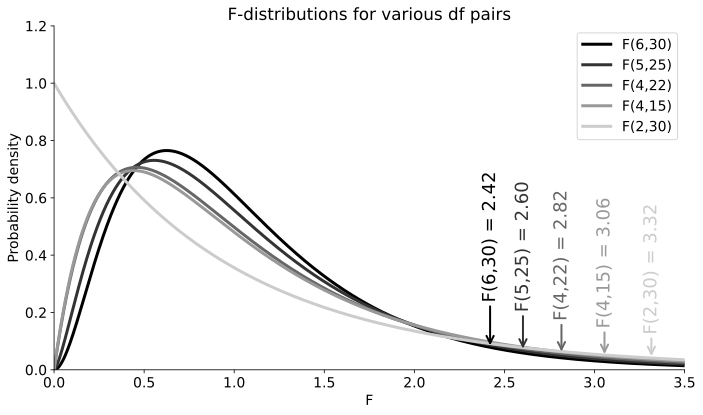

In [5]:
# x range
x = np.linspace(0,3.5,1000)

# degrees of freedom pairs
df_pairs = [(6,30), (5,25), (4,22), (4,15), (2,30)]



plt.figure(figsize=(10,6))
for i,(df1,df2) in enumerate(df_pairs):

  # F pdf
  F = stats.f.pdf(x, df1, df2)

  # color
  c = i/len(df_pairs)

  # plot 
  plt.plot(x,F,linewidth=3,color=(c,c,c),label=fr'F({df1},{df2})')

  # critical F value for p=.05
  crit_f_x = stats.f.ppf(.95,df1,df2) # this is the F value
  crit_f_y = stats.f.pdf(crit_f_x,df1,df2) # this is the y-axis coordinate (prob density)


  # annotation for the critical F value
  plt.annotate(text=fr'F({df1},{df2}) = {crit_f_x:.2f}',color=(c,c,c),xy=(crit_f_x,crit_f_y),rotation=90,
                xytext=(crit_f_x,crit_f_y*3),fontsize=18,
                arrowprops=dict(color=(c,c,c), arrowstyle='->',linewidth=2),
                ha='center', va='bottom')

# labels etc
plt.title('F-distributions for various df pairs',loc='center')
plt.xlabel('F')
plt.xlim([0,x[-1]])
plt.ylim([0,1.2])
plt.ylabel('Probability density')
plt.legend()

# display figure
plt.tight_layout()
plt.show()

### Fig 14.5: one way ANOVA table

In [6]:
# pending

### Fig 14.6: Bar plot used for Tukey test description

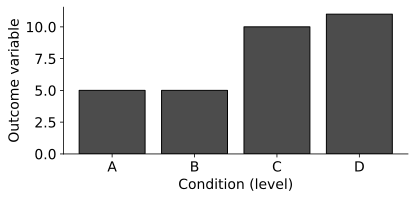

In [7]:
y = [ 5,5,10,11]
L = ['A','B','C','D']

plt.figure(figsize=(6,3))
plt.bar(range(len(L)),y,color=(.3,.3,.3),edgecolor='k')
plt.xticks(range(len(L)),labels=L)
plt.xlabel('Condition (level)')
plt.ylabel('Outcome variable')

# display figure
plt.tight_layout()
plt.show()

### Fig 14.7: Q-distributions with various df pairs

In [8]:
# x range
x = np.linspace(0,6,100)

# degrees of freedom pairs
df_pairs = [(6,30), (5,25), (4,22), (4,15), (2,30)]

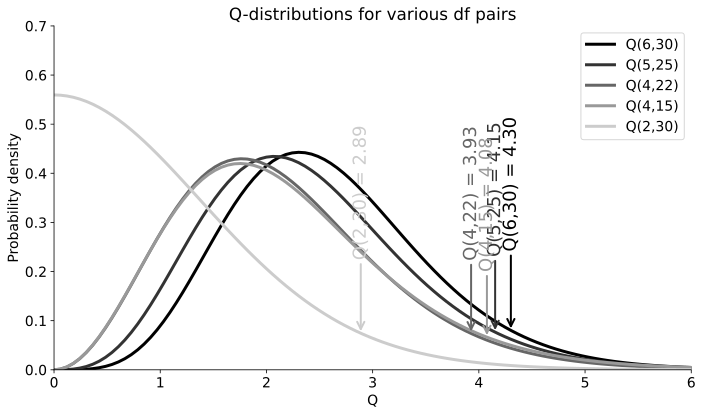

In [9]:
plt.figure(figsize=(10,6))
for i,(df1,df2) in enumerate(df_pairs):

  # Q pdf
  Q = stats.studentized_range.pdf(x,df1,df2)

  # color
  c = i/len(df_pairs)

  # plot the distribution
  plt.plot(x,Q,linewidth=3,color=(c,c,c),label=fr'Q({df1},{df2})')

  # critical Q value for p=.05
  crit_q_x = stats.studentized_range.ppf(.95,df1,df2) # this is the F value
  crit_q_y = stats.studentized_range.pdf(crit_q_x,df1,df2) # this is the y-axis coordinate (prob density)


  # Add annotation for the critical Q value
  plt.annotate(text=fr'Q({df1},{df2}) = {crit_q_x:.2f}',color=(c,c,c),xy=(crit_q_x,crit_q_y),rotation=90,
                xytext=(crit_q_x,crit_q_y*3),fontsize=18,
                arrowprops=dict(color=(c,c,c), arrowstyle='->',linewidth=2),
                ha='center', va='bottom')

# labels etc
plt.title('Q-distributions for various df pairs',loc='center')
plt.xlabel('Q')
plt.xlim([0,x[-1]])
plt.ylim([0,.7])
plt.ylabel('Probability density')
plt.legend()

# display figure
plt.tight_layout()
plt.show()

### Fig 14.15 - 14.18: Example rmANOVA 

In [12]:
data = {
    'Participant': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']*4,
    'Snack': ['Baseline']*8 + ['Chocolate']*8 + ['Chips']*8 + ['Ice Cream']*8,
    'Mood': [5, 7, 6, 6, 5, 8, 7, 6,  # Baseline
             6, 8, 8, 7, 8, 9, 8, 7,  # Chocolate
             5, 7, 6, 5, 4, 6, 4, 6,  # Chips
             7, 9, 7, 8, 7, 9, 8, 9]  # Ice Cream
}

df = pd.DataFrame(data)



In [13]:

# show the data in "wide" format
df.pivot(index='Participant', columns='Snack', values='Mood')

# show the data in "long" format
df[::4]

,Participant,Snack,Mood
0,P1,Baseline,5
4,P5,Baseline,5
8,P1,Chocolate,6
12,P5,Chocolate,8
16,P1,Chips,5
20,P5,Chips,4
24,P1,Ice Cream,7
28,P5,Ice Cream,7


/tmp/ipykernel_11171/3844340909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Snack', y='Mood', data=df, palette='BuPu')


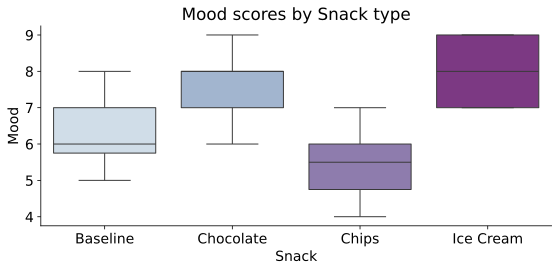

In [14]:
# Plot 
plt.figure(figsize=(8,4))
sns.boxplot(x='Snack', y='Mood', data=df, palette='BuPu')
plt.title('Mood scores by Snack type',loc='center')

plt.tight_layout()
plt.show()
     


In [17]:
rmANOVA = pg.rm_anova(data=df, dv='Mood', within='Snack',
                      subject='Participant', detailed=True)
rmANOVA
     


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Snack,35.625,3,11.875000,24.036145,5.456379e-07,0.5666,0.701599
1,Error,10.375,21,0.494048,NaN,NaN,NaN,NaN


In [18]:
# pairwise comparisons
pairwise_tests = pg.pairwise_tests(data=df, dv='Mood', within='Snack',
                                    subject='Participant',padjust='bonferroni')

print(pairwise_tests)

  Contrast          A          B  Paired  Parametric         T  dof  \
0    Snack   Baseline      Chips    True        True  2.197950  7.0   
1    Snack   Baseline  Chocolate    True        True -5.227101  7.0   
2    Snack   Baseline  Ice Cream    True        True -7.000000  7.0   
3    Snack      Chips  Chocolate    True        True -4.965096  7.0   
4    Snack      Chips  Ice Cream    True        True -8.104372  7.0   
5    Snack  Chocolate  Ice Cream    True        True -1.000000  7.0   

  alternative     p-unc    p-corr    p-adjust     BF10    hedges  
0   two-sided  0.063924  0.383545  bonferroni    1.582  0.789415  
1   two-sided  0.001216  0.007298  bonferroni   35.164 -1.330027  
2   two-sided  0.000212  0.001269  bonferroni   147.28 -1.684907  
3   two-sided  0.001628  0.009769  bonferroni   27.768 -2.146524  
4   two-sided  0.000084  0.000503  bonferroni  317.037 -2.492972  
5   two-sided  0.350617  1.000000  bonferroni      0.5 -0.384963  


In [19]:


# calculate the mean for each group
group_means = df.groupby('Snack')['Mood'].mean()

# column of predicted data
df['Predicted'] = df['Snack'].map(group_means)

# column of residuals
df['Residual'] = df['Mood'] - df['Predicted']

# show a few rows
df[::4]
     


,Participant,Snack,Mood,Predicted,Residual
0,P1,Baseline,5,6.250,-1.250
4,P5,Baseline,5,6.250,-1.250
8,P1,Chocolate,6,7.625,-1.625
12,P5,Chocolate,8,7.625,0.375
16,P1,Chips,5,5.375,-0.375
20,P5,Chips,4,5.375,-1.375
24,P1,Ice Cream,7,8.000,-1.000
28,P5,Ice Cream,7,8.000,-1.000


### Fig 14.21: Inspecting ANOVA results

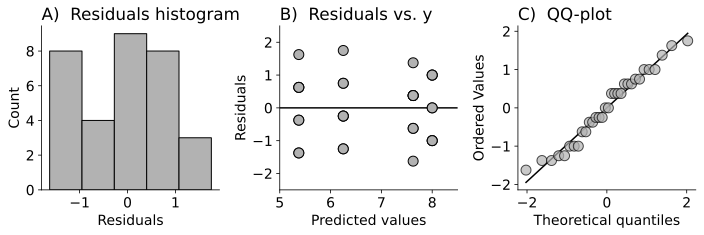

In [20]:
_,axs = plt.subplots(1,3,figsize=(10,3.5))

# histogram
axs[0].hist(df['Residual'],bins=5,facecolor=(.7,.7,.7),edgecolor='k')
axs[0].set(xlabel='Residuals',ylabel='Count')
axs[0].set_title(r'A)  Residuals histogram')

# residuals by fitted values
axs[1].plot(df['Predicted'], df['Residual'],'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1].axhline(y=0, color='k', linestyle='-', zorder=-2)
axs[1].set(xlabel='Predicted values',ylabel='Residuals',xlim=[5,8.5],ylim=[-2.5,2.5])
axs[1].set_title(r'B)  Residuals vs. y')

# QQ plot
stats.probplot(df['Residual'],dist='norm',plot=axs[2])
axs[2].get_lines()[0].set(markerfacecolor=(.7,.7,.7),
                          markeredgecolor='k',
                          markersize=10,
                          alpha=.7)
axs[2].get_lines()[1].set(zorder=-1,color='k')
axs[2].set_title(r'C)  QQ-plot')


plt.tight_layout()
plt.show()